In [24]:
import numpy as np
import matplotlib.pyplot as plt
import statistics
import random
import sys
from sklearn.metrics import r2_score
sys.path.append('../')


In [18]:
from model.mutation_model import Prev1MutationModel

In [126]:
LENGTH = 100000
KMAX = 40
SAMPLES = 1000

In [127]:
from multiprocess import Pool

max_pool = 8
offset = 15

def compute_estimated_ani(mut_model, kval):
    containment_score = mut_model.containment(kval)
    containment_score_m = mut_model.containment(kval-offset)
    return mut_model.ground_ani, containment_score / ((containment_score / containment_score_m) ** ((kval-1)/offset)), containment_score ** (1/kval)

def generate_prev1_mutations(p0_min, p0_max, p1_min, p1_max, model_len, num_samples):
    with Pool(max_pool) as p:
        arg_vals = [(random.uniform(p0_min,p0_max), random.uniform(p1_min,p1_max), model_len) for _ in range(num_samples)]
        return p.starmap(Prev1MutationModel, arg_vals)
    # return [Prev1MutationModel(random.uniform(p0_min,p0_max), random.uniform(p1_min,p1_max), model_len) for _ in range(num_samples)]

In [128]:
mutation_models = generate_prev1_mutations(0,0.5,0,0.5,LENGTH,SAMPLES)

In [133]:
true_ani_vals = []
estimated_ani_vals = []
KVAL = 20


def compute_mutation_model_ani(mutation_models):
    with Pool(max_pool) as p:
        return p.starmap(compute_estimated_ani,zip(mutation_models,[KVAL for _ in range(SAMPLES)]))


true_ani_vals, estimated_ani_vals, naive_estimated_ani_vals = zip(*compute_mutation_model_ani(mutation_models))


/tmp/ipykernel_20633/3784763721.py:9: RuntimeWarning: invalid value encountered in scalar divide
  return mut_model.ground_ani, containment_score / ((containment_score / containment_score_m) ** ((kval-1)/offset)), containment_score ** (1/kval)
/tmp/ipykernel_20633/3784763721.py:9: RuntimeWarning: invalid value encountered in scalar divide
  return mut_model.ground_ani, containment_score / ((containment_score / containment_score_m) ** ((kval-1)/offset)), containment_score ** (1/kval)
/tmp/ipykernel_20633/3784763721.py:9: RuntimeWarning: invalid value encountered in scalar divide
  return mut_model.ground_ani, containment_score / ((containment_score / containment_score_m) ** ((kval-1)/offset)), containment_score ** (1/kval)
/tmp/ipykernel_20633/3784763721.py:9: RuntimeWarning: invalid value encountered in scalar divide
  return mut_model.ground_ani, containment_score / ((containment_score / containment_score_m) ** ((kval-1)/offset)), containment_score ** (1/kval)
/tmp/ipykernel_20633/378

ValueError: Input contains NaN.

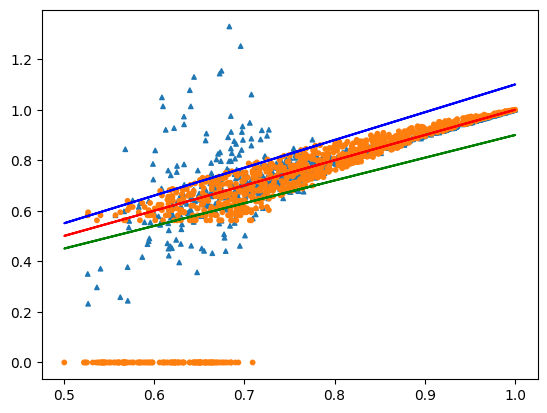

In [134]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(true_ani_vals,estimated_ani_vals,marker="^",s=[10 for _ in true_ani_vals])
ax.scatter(true_ani_vals,naive_estimated_ani_vals,marker="o",s=[10 for _ in true_ani_vals])
ax.plot(true_ani_vals,true_ani_vals,"r-")
ax.plot(true_ani_vals,[0.9 * x for x in true_ani_vals],"g-")
ax.plot(true_ani_vals,[1.1 * x for x in true_ani_vals],"b-")
ax.annotate(f"r^2 score = {r2_score(true_ani_vals,estimated_ani_vals)}",(0,1))
ax.plot()
